In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from xgboost.sklearn import XGBClassifier
#train_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header = None)

In [71]:
#url='./adult.data'
#columns name according to adult.names
cols=["age","workclass","fnlwgt","education","education-num","marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week","native-country","wage_class"]

train_set=pd.read_csv('adult.data', names=cols)   # reading and setting names

train_set.head()


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [72]:
test_set = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test', skiprows = 1, header = None)
test_set.columns = cols

In [73]:
test_set.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [74]:
train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

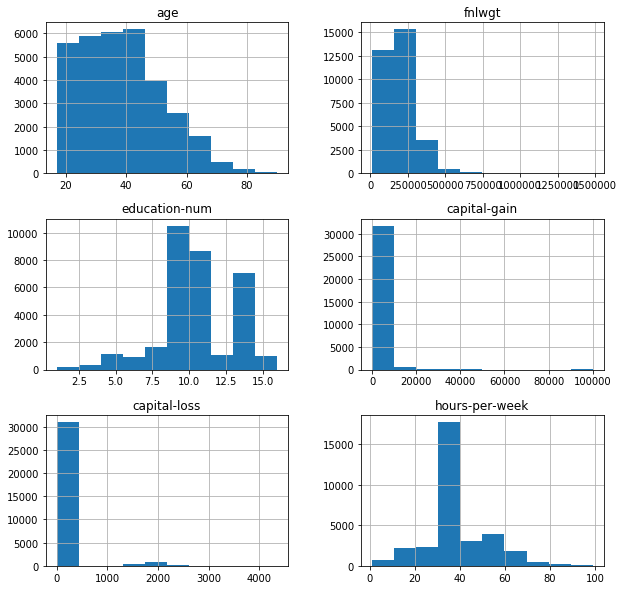

In [75]:
train_set.hist(figsize=(10,10))
plt.show()

In [76]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage_class        0
dtype: int64

In [77]:
train_set.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage_class        object
dtype: object

In [78]:
for feature in cols:
    if train_set[feature].dtype == 'object':
        
        print('_'*10,feature, end=" ",)
        print('_'*10)
        print(train_set[feature].value_counts())

__________ workclass __________
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
__________ education __________
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64
__________ marital-status __________
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name

In [79]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'wage_class'],
      dtype='object')

In [80]:
import re
train_set.rename(columns=lambda name: re.sub(r"\-",'_',name), inplace=True)

In [81]:
train_set.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [82]:
#filter1 = train_set["workclass"]=="?"
#index= train_set.where(filter1).index
index = train_set[train_set["native_country"]== ' ?'].index
#index.value_counts()  # to display all the indexes having value '?'
index.value_counts().sum()  # sum of those indexes 
# type(index

583

In [83]:
#now apply the filter for the '?' value in those above 3 columns

indexes_list = [] # will contain three index series of desired syntexes
def filter_questionMark(l):
    
    for item in l:
        print('_'*10,item, '_'*10)
        index = train_set[train_set[item]== ' ?'].index
        indexes_list.append(index)
        #index.value_counts()  # to display all the indexes having value '?'
        print("Total `?` in {0}: {1}".format(item, index.value_counts().sum()))  # sum of those indexes 
        print("Total % of `?` in {0}: {1}".format(item, round((index.value_counts().sum()/train_set.shape[0])*100,2)))
        
filter2= ['workclass','occupation', 'native_country']
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 1836
Total % of `?` in workclass: 5.64
__________ occupation __________
Total `?` in occupation: 1843
Total % of `?` in occupation: 5.66
__________ native_country __________
Total `?` in native_country: 583
Total % of `?` in native_country: 1.79


In [56]:
print("Original Shape of Train Set:", train_set.shape)
print("Rows in Train Set:", train_set.shape[0])

Original Shape of Train Set: (32561, 15)
Rows in Train Set: 32561


In [89]:
indexes_list

[Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
               187,
             ...
             32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
             32542],
            dtype='int64', length=1836),
 Int64Index([   27,    61,    69,    77,   106,   128,   149,   154,   160,
               187,
             ...
             32426, 32477, 32490, 32494, 32525, 32530, 32531, 32539, 32541,
             32542],
            dtype='int64', length=1843),
 Int64Index([   14,    38,    51,    61,    93,   245,   249,   297,   393,
               453,
             ...
             32213, 32232, 32254, 32307, 32413, 32449, 32469, 32492, 32510,
             32525],
            dtype='int64', length=583)]

In [84]:
print('\n Drowping `?` indexes from `workclass` featutre....')
train_set= train_set.drop(indexes_list[0])
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `workclass` featutre....
Total New rows: 30725


In [91]:

print('\n Drowping `?` indexes from `native_country` featutre....')
index1= train_set[train_set["native_country"]== ' ?'].index
train_set = train_set.drop(index1)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `native_country` featutre....
Total New rows: 30169


In [93]:
print('\n Drowping `?` indexes from `occupation` featutre....')
index2 = train_set[train_set["occupation"]== ' ?'].index
train_set = train_set.drop(index2)
print("Total New rows:",train_set.shape[0])


 Drowping `?` indexes from `occupation` featutre....
Total New rows: 30162


In [94]:
# check for '?' again
filter_questionMark(filter2)

__________ workclass __________
Total `?` in workclass: 0
Total % of `?` in workclass: 0.0
__________ occupation __________
Total `?` in occupation: 0
Total % of `?` in occupation: 0.0
__________ native_country __________
Total `?` in native_country: 0
Total % of `?` in native_country: 0.0


In [95]:
#Applying one hot coding to all the categorical variables
df1 = train_set.copy()

objectFeature = []
for i in list(df1.columns):
    if (df1[i].dtypes == 'object'):
        objectFeature.append(i)
        

df1=pd.get_dummies(df1[objectFeature[:-1]])

In [97]:
intFeature = []
for i in list(train_set.columns):
    if (train_set[i].dtypes == 'int64'):
        intFeature.append(i)

df2 = train_set[intFeature]

In [98]:

print(df1.shape)
print(df2.shape)

(30162, 98)
(30162, 6)


In [99]:
X_train = pd.concat([df1, df2], axis=1)
X_train.shape   # final dataframe to be get Trained

(30162, 104)

In [100]:

y=train_set[objectFeature[-1]]

In [104]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# le.fit(y)
# le.classes_   # will display only two classes---> array([' <=50K', ' >50K'], dtype=object)y_train
y_train=le.fit_transform(y)

In [105]:
y_train

array([0, 0, 0, ..., 0, 0, 1])

In [119]:
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [122]:
#model01
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': .5,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 100
}

In [107]:
x_train, x_test, y_t1, y_t2 =train_test_split(X_train, y_train, test_size=.25)

In [109]:

x_train.shape, x_test.shape, y_t1.shape, y_t2.shape

((22621, 104), (7541, 104), (22621,), (7541,))

In [123]:
#Model1
xgb = XGBClassifier(**params).fit(x_train,y_t1)

C:\Users\Satvik\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:52:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [124]:
y_pred= xgb.predict(x_test)
accuracy_score(y_t2, y_pred)

0.8683198514785837

In [125]:
#Model02

eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

C:\Users\Satvik\Anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.17722	validation_0-logloss:0.50744	validation_1-error:0.17146	validation_1-logloss:0.50518
[1]	validation_0-error:0.16118	validation_0-logloss:0.43601	validation_1-error:0.15542	validation_1-logloss:0.43364
[2]	validation_0-error:0.16122	validation_0-logloss:0.40207	validation_1-error:0.15900	validation_1-logloss:0.40000
[3]	validation_0-error:0.15441	validation_0-logloss:0.37807	validation_1-error:0.15475	validation_1-logloss:0.37758
[4]	validation_0-error:0.15273	validation_0-logloss:0.36328	validation_1-error:0.15144	validation_1-logloss:0.36309
[5]	validation_0-error:0.15260	valid

[67]	validation_0-error:0.12913	validation_0-logloss:0.28339	validation_1-error:0.13473	validation_1-logloss:0.28794
[68]	validation_0-error:0.12873	validation_0-logloss:0.28318	validation_1-error:0.13447	validation_1-logloss:0.28788
[69]	validation_0-error:0.12860	validation_0-logloss:0.28290	validation_1-error:0.13420	validation_1-logloss:0.28749
[70]	validation_0-error:0.12860	validation_0-logloss:0.28282	validation_1-error:0.13420	validation_1-logloss:0.28745
[71]	validation_0-error:0.12869	validation_0-logloss:0.28274	validation_1-error:0.13420	validation_1-logloss:0.28748
[72]	validation_0-error:0.12869	validation_0-logloss:0.28240	validation_1-error:0.13420	validation_1-logloss:0.28718
[73]	validation_0-error:0.12855	validation_0-logloss:0.28222	validation_1-error:0.13433	validation_1-logloss:0.28710
[74]	validation_0-error:0.12846	validation_0-logloss:0.28203	validation_1-error:0.13447	validation_1-logloss:0.28729
[75]	validation_0-error:0.12886	validation_0-logloss:0.28187	val

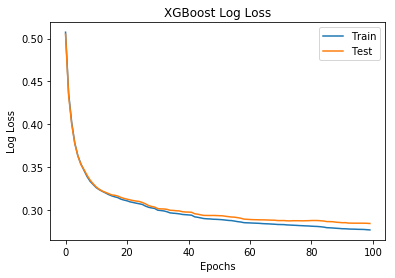

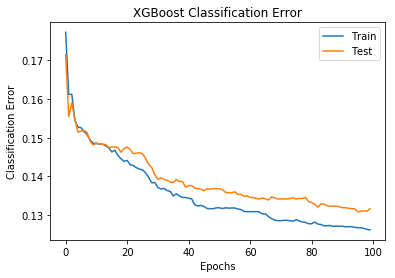

In [126]:
#Ploting Classifying errors and log loss with respect to each iteration¶
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [129]:
#model03
params = {
    'objective': 'binary:logistic',
    'max_depth': 20,
    'learning_rate': .01,
    'silent': True,    # would be boolean in sklearn
    'n_estimators': 200}



In [130]:
eval_set = [(x_train,y_t1), (x_test, y_t2)]
xgb1 = XGBClassifier(**params).fit(x_train,y_t1,
                                   early_stopping_rounds=15, 
                                   eval_metric=["error", "logloss"], 
                                   eval_set=eval_set,
                                   verbose=True)

[20:55:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.09394	validation_0-logloss:0.68632	validation_1-error:0.16576	validation_1-logloss:0.68710
[1]	validation_0-error:0.09230	validation_0-logloss:0.67966	validation_1-error:0.16311	validation_1-logloss:0.68115
[2]	validation_0-error:0.09222	validation_0-logloss:0.67314	validation_1-error:0.15993	validation_1-logloss:0.67533
[3]	validation_0-error:0.09292	validation_0-logloss:0.66673	validation_1-error:0.15993	validation_1-logloss:0.66964
[4]	validation_0-error:0.09328	validation_0-logloss:0.66045	validation_1-error:0.15926	validation_1-logloss:0.66405
[5]	validation_0-error:0.09319	valid

[67]	validation_0-error:0.07847	validation_0-logloss:0.41175	validation_1-error:0.14799	validation_1-logloss:0.45249
[68]	validation_0-error:0.07829	validation_0-logloss:0.40926	validation_1-error:0.14799	validation_1-logloss:0.45053
[69]	validation_0-error:0.07820	validation_0-logloss:0.40678	validation_1-error:0.14799	validation_1-logloss:0.44862
[70]	validation_0-error:0.07780	validation_0-logloss:0.40436	validation_1-error:0.14812	validation_1-logloss:0.44672
[71]	validation_0-error:0.07763	validation_0-logloss:0.40197	validation_1-error:0.14786	validation_1-logloss:0.44483
[72]	validation_0-error:0.07767	validation_0-logloss:0.39960	validation_1-error:0.14759	validation_1-logloss:0.44298
[73]	validation_0-error:0.07745	validation_0-logloss:0.39724	validation_1-error:0.14706	validation_1-logloss:0.44119
[74]	validation_0-error:0.07741	validation_0-logloss:0.39496	validation_1-error:0.14746	validation_1-logloss:0.43935
[75]	validation_0-error:0.07745	validation_0-logloss:0.39266	val

[137]	validation_0-error:0.06874	validation_0-logloss:0.29108	validation_1-error:0.14468	validation_1-logloss:0.36414
[138]	validation_0-error:0.06892	validation_0-logloss:0.28996	validation_1-error:0.14468	validation_1-logloss:0.36332
[139]	validation_0-error:0.06887	validation_0-logloss:0.28876	validation_1-error:0.14481	validation_1-logloss:0.36257
[140]	validation_0-error:0.06870	validation_0-logloss:0.28759	validation_1-error:0.14481	validation_1-logloss:0.36180
[141]	validation_0-error:0.06874	validation_0-logloss:0.28646	validation_1-error:0.14454	validation_1-logloss:0.36104
[142]	validation_0-error:0.06861	validation_0-logloss:0.28534	validation_1-error:0.14441	validation_1-logloss:0.36029
[143]	validation_0-error:0.06834	validation_0-logloss:0.28421	validation_1-error:0.14441	validation_1-logloss:0.35953
[144]	validation_0-error:0.06839	validation_0-logloss:0.28306	validation_1-error:0.14468	validation_1-logloss:0.35883
[145]	validation_0-error:0.06790	validation_0-logloss:0.

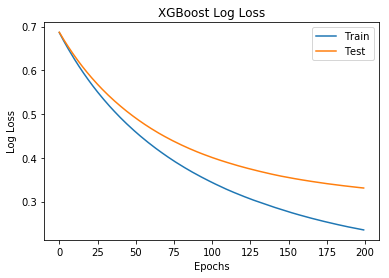

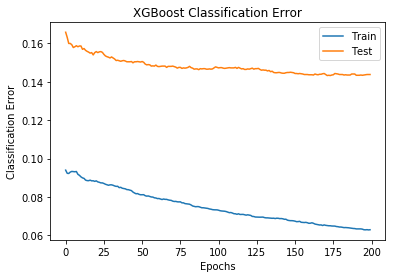

In [131]:
#plot
# retrieve performance metrics
results = xgb1.evals_result()
epochs = len(results['validation_0']['error'])
x = range(0, epochs)
# plot log loss
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['logloss'], label='Train')
ax.plot(x, results['validation_1']['logloss'], label='Test')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Epochs')
plt.title('XGBoost Log Loss')
plt.show()
# plot classification error
fig, ax = plt.subplots()
ax.plot(x, results['validation_0']['error'], label='Train')
ax.plot(x, results['validation_1']['error'], label='Test')
ax.legend()
plt.ylabel('Classification Error')
plt.xlabel('Epochs')
plt.title('XGBoost Classification Error')
plt.show()

In [133]:
import xgboost as xgb
dtrain = xgb.DMatrix(x_train, label = y_t1)
dtest = xgb.DMatrix(x_test, label = y_t2)

#creating watchlist of training
# to see out output 
watchlist = [(dtrain,'train'),(dtest, 'eval')]
             

In [134]:
params = {
    'objective': 'binary:logistic',
    'max_depth': 2,
    'learning_rate': 1.0,
    'silent': True,    # would be boolean in sklearn
    'booster' : 'gbtree',
    'max_depth' : 7,
    'eval_metric' : 'auc'
}
# using bydeafault eta [default=0.3, alias: learning_rate]

num_rounds = 100

In [135]:
model_xgb = xgb.train(params, dtrain, num_rounds, evals = watchlist, early_stopping_rounds = 15, verbose_eval = True)

[20:59:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-auc:0.90442	eval-auc:0.89950
[1]	train-auc:0.91797	eval-auc:0.91096
[2]	train-auc:0.92422	eval-auc:0.91418
[3]	train-auc:0.92892	eval-auc:0.91886
[4]	train-auc:0.93401	eval-auc:0.91985
[5]	train-auc:0.93758	eval-auc:0.91953
[6]	train-auc:0.93895	eval-auc:0.92026
[7]	train-auc:0.94159	eval-auc:0.91990
[8]	train-auc:0.94352	eval-auc:0.92099
[9]	train-auc:0.94565	eval-auc:0.91941
[10]	train-auc:0.94668	eval-auc:0.91964
[11]	train-auc:0.94864	eval-auc:0.92031
[12]	train-auc:0.95018	eval-auc:0.91985
[13]	train-auc:0.95102	eval-auc:0.92048
[14]	train-auc:0.95223	eval-auc:0.92006
[15]	train-auc:0.95246	eva

In [136]:
features_contribution = pd.Series(model_xgb.get_fscore()).sort_values(ascending=False)

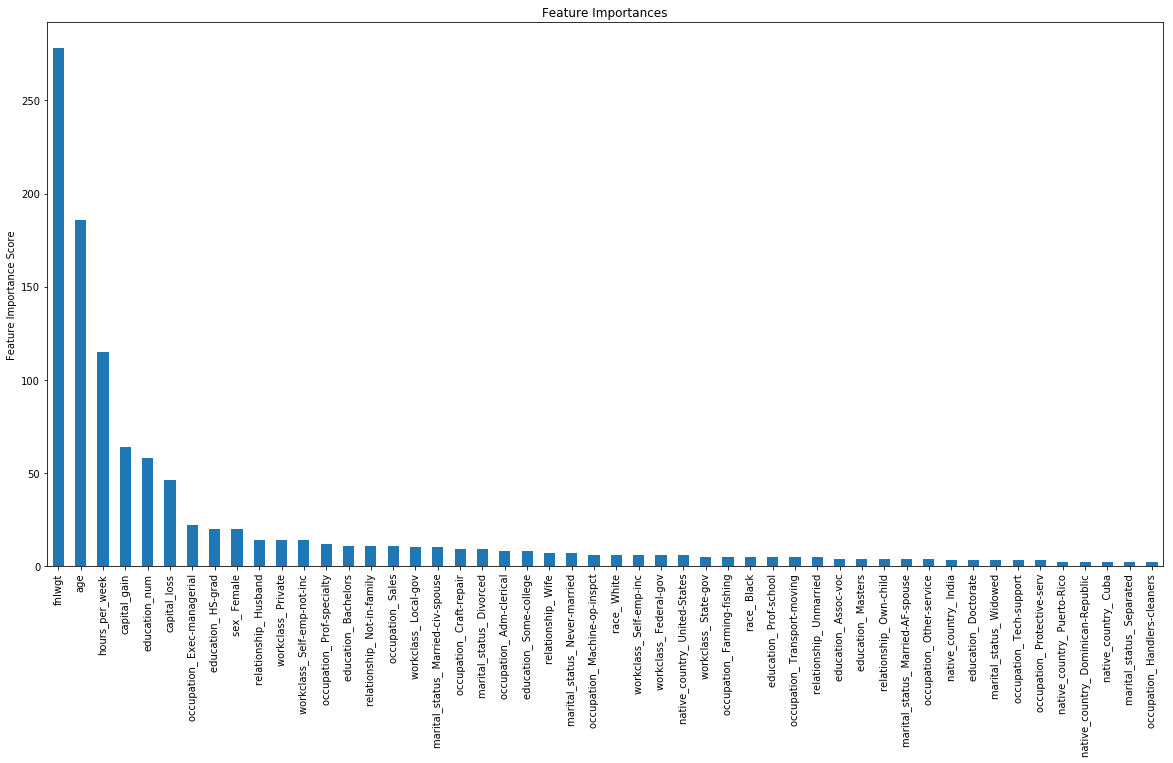

In [137]:
plt.figure(figsize=(20,10))
features_contribution[:50].plot(kind='bar', title='Feature Importances')
#features_contribution[:50].plot(kind='line')
plt.ylabel('Feature Importance Score')
plt.show()